In [1]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np

In [2]:
df1= pd.read_excel(r"C:\Users\Admin\Desktop\All files\csv files\Mexico housing data\Mexico housing data 1.xlsx")
df1.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,5,house,Yucatán,21.052583,-89.538639,205,105191.37


In [3]:
df2= pd.read_excel(r"C:\Users\Admin\Desktop\All files\csv files\Mexico housing data\Mexico housing data 2.xlsx")
df2.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,2,apartment,Puebla,NaN,NaN,190,2500000
2,3,house,Morelos,23.634501,-102.552788,360,5300000
3,4,house,Morelos,NaN,NaN,76,820000
4,5,house,Puebla,NaN,NaN,200,1100000


In [4]:
df2['price_usd'] = df2['price_mxn'] * 0.058

In [5]:
df3 = pd.read_excel(r"C:\Users\Admin\Desktop\All files\csv files\Mexico housing data\Mexico housing data 3.xlsx")
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [6]:
df3['state'] = df3['place_with_parent_names'].str.split('|', expand = True)[2]
df3['state']

0                     Distrito Federal
1                     Estado de México
2                     Estado de México
3                              Morelos
4      Veracruz de Ignacio de la Llave
                    ...               
695                            Jalisco
696                            Morelos
697                            Yucatán
698                    San Luis Potosí
699                   Estado de México
Name: state, Length: 700, dtype: object

In [7]:
df3['state'].head()

0                   Distrito Federal
1                   Estado de México
2                   Estado de México
3                            Morelos
4    Veracruz de Ignacio de la Llave
Name: state, dtype: object

In [8]:
df3[['lat','lon']] = df3['lat-lon'].str.split(',', expand = True)
df3[['lat','lon']].head()

,lat,lon
0,19.52589,-99.151703
1,19.2640539,-99.5727534
2,19.268629,-99.671722
3,NaN,NaN
4,19.511938,-96.871956


In [9]:
df = pd.concat([df1, df2, df3])
df.drop(columns = ['price_mxn', 'place_with_parent_names' ,'lat-lon', 'Unnamed: 0'], inplace = True)
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [10]:
df.isnull().sum()

property_type      0
state              0
lat              247
lon              247
area_m2            0
price_usd          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3136 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  3136 non-null   object 
 1   state          3136 non-null   object 
 2   lat            2889 non-null   object 
 3   lon            2889 non-null   object 
 4   area_m2        3136 non-null   int64  
 5   price_usd      3136 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 171.5+ KB


In [12]:
df['lon'] = df['lon'].astype(str)

df['lon'] = df['lon'].str.replace('-', '', regex = True)
df['lon'] = df['lon'].astype(float)

In [13]:
df['lat'] = df['lat'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3136 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  3136 non-null   object 
 1   state          3136 non-null   object 
 2   lat            2889 non-null   float64
 3   lon            2889 non-null   float64
 4   area_m2        3136 non-null   int64  
 5   price_usd      3136 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 171.5+ KB


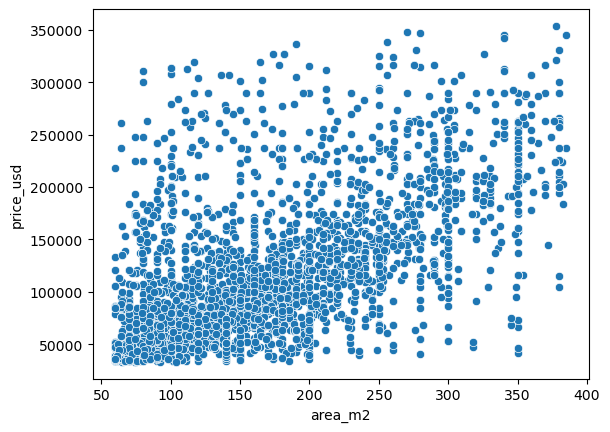

In [15]:
sns.scatterplot(x = 'area_m2', y = 'price_usd', data = df);

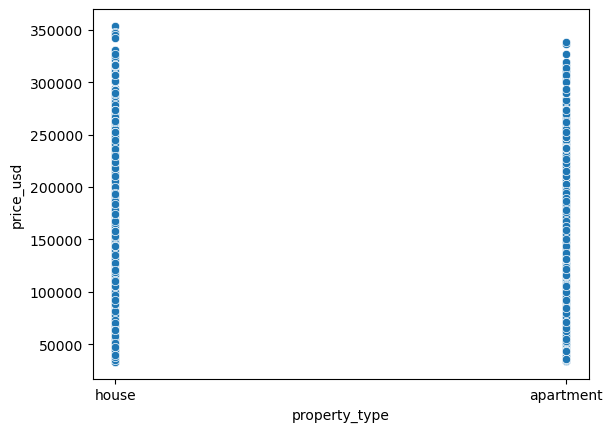

In [16]:
sns.scatterplot(x = 'property_type', y = 'price_usd', data = df);

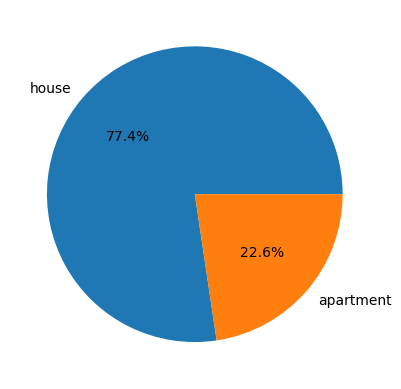

In [17]:
a = df['property_type'].value_counts()

plt.pie(a, labels = a.index, autopct = '%1.1f%%');

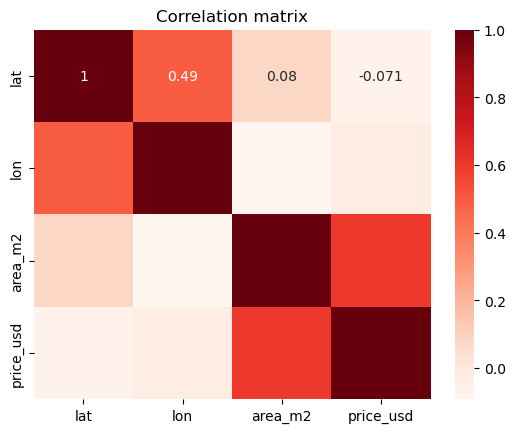

In [18]:
sns.heatmap(df.corr(numeric_only=True), cmap = 'Reds', annot=True) 
plt.title("Correlation matrix");

In [75]:
corr = df.corr()
corr.style.background_gradient(axis=None)

,state,lat,lon,area_m2,price_usd,house,apartment
state,1.000000,0.084472,-0.465418,0.216550,-0.045598,0.240730,-0.240730
lat,0.084472,1.000000,0.492169,0.076861,-0.067033,0.172335,-0.172335
lon,-0.465418,0.492169,1.000000,-0.089059,-0.028725,0.019434,-0.019434
area_m2,0.216550,0.076861,-0.089059,1.000000,0.595415,0.434622,-0.434622
price_usd,-0.045598,-0.067033,-0.028725,0.595415,1.000000,-0.015051,0.015051
house,0.240730,0.172335,0.019434,0.434622,-0.015051,1.000000,-1.000000
apartment,-0.240730,-0.172335,-0.019434,-0.434622,0.015051,-1.000000,1.000000


In [19]:
correlation_coefficient = df['price_usd'].corr(df['area_m2'])
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.5954151623134007


In [20]:
scaler = StandardScaler()

In [21]:
label_enc = LabelEncoder()

In [22]:
df['state'] = label_enc.fit_transform(df['state'])
df['state']

0       9
1      16
2      11
3      11
4      28
       ..
695    13
696    14
697    28
698    21
699     9
Name: state, Length: 3136, dtype: int32

In [23]:
ohe = OneHotEncoder()

In [24]:
df[['house', 'apartment']] = ohe.fit_transform(df[['property_type']])

In [25]:
df.drop(columns = 'property_type', inplace = True)

In [26]:
df.head()

,state,lat,lon,area_m2,price_usd,house,apartment
0,9,19.560181,99.233528,150,67965.56,1,0
1,16,25.688436,100.198807,186,63223.78,1,0
2,11,16.767704,99.764383,82,84298.37,0,1
3,11,16.829782,99.911012,150,94308.80,0,1
4,28,21.052583,89.538639,205,105191.37,1,0


In [27]:
df.isnull().sum()

state          0
lat          247
lon          247
area_m2        0
price_usd      0
house          0
apartment      0
dtype: int64

In [28]:
a = round(df['lat'].mean(), 6)
b = round(df['lon'].mean(), 6)

In [29]:
df['lat'] = df['lat'].fillna(a)
df['lon'] = df['lon'].fillna(b)

In [30]:
X = df.drop(columns = 'price_usd')
y = df['price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1>LinearRegression</h1>

In [32]:
model_linear = LinearRegression()

In [33]:
model_linear.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
pred_linear = model_linear.predict(X_test_scaled)

r2 = r2_score(y_test, pred_linear)
print('R-squared Score:', round(r2, 2))

R-squared Score: 0.49


In [35]:
Mae_linear = mean_absolute_error(y_test, pred_linear)
print("Mean Absolute Error:" , Mae_linear)

Mean Absolute Error: 36521.06571985606


<h1>DecisionTreeRegressor</h1>

In [36]:
model_tree = DecisionTreeRegressor(random_state=42, max_depth = 25)


model_tree.fit(X_train_scaled, y_train)


DecisionTreeRegressor(max_depth=25, random_state=42)

In [37]:
pred_tree = model_tree.predict(X_test_scaled)

r2 = r2_score(y_test, pred_tree)
print('R-squared Score:', round(r2, 2))



R-squared Score: 0.72


In [38]:
Mae_tree = mean_absolute_error(y_test, pred_tree)
print("Mean Absolute Error:" , Mae_tree)

Mean Absolute Error: 19303.083808651805


100%|████████████████████████████████████████████████████████████████████████████████| 198/198 [00:08<00:00, 24.00it/s]


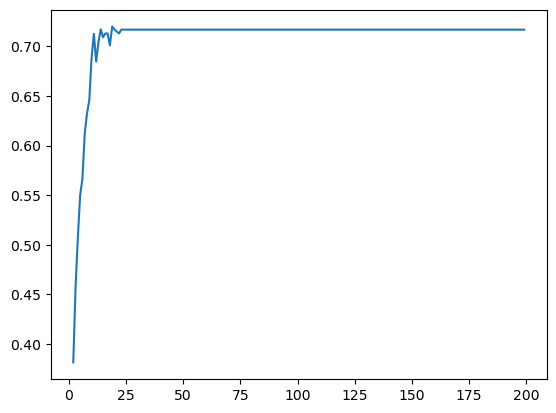

In [39]:
l = []

for i in tqdm(range(2,200)):
    model_tree = make_pipeline(DecisionTreeRegressor(max_depth = i, random_state=42))
    model_tree.fit(X_train_scaled, y_train)
    l.append(model_tree.score(X_test_scaled, y_test))
    
plt.plot([x for x in range(2,200)], l)
plt.show()

<h1>RandomForestRegressor</h1>

In [40]:
forest_regressor = RandomForestRegressor(random_state = 42)

In [41]:
forest_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [42]:
pred_forest = forest_regressor.predict(X_test_scaled)

In [43]:
r2 = r2_score(y_test, pred_forest)
print('R-squared Score:', round(r2, 2))

R-squared Score: 0.79


In [44]:
pred_forest[:5]

array([242122.5371719 , 123665.385675  , 120480.65797833, 252856.05818333,
       203531.13146667])

In [45]:
Mae_forest = mean_absolute_error(y_test, pred_forest)
print("Mean Absolute Error:" , Mae_forest)

Mean Absolute Error: 20718.577796058475


<h1>GRIDSEARCH</h1>

In [46]:
clr = RandomForestRegressor(random_state=42)
clr

RandomForestRegressor(random_state=42)

In [47]:
params = {
    'n_estimators' : range(25, 200, 25),
    'max_depth' : range(10, 100, 10)
}

In [48]:
model_grid = GridSearchCV(
    clr, 
    param_grid = params,
    verbose = 1,
    n_jobs = -1,
    cv = 5
)

In [49]:
model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 100, 10),
                         'n_estimators': range(25, 200, 25)},
             verbose=1)

In [50]:
model_grid.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [51]:
acc_train = model_grid.score(X_train_scaled, y_train)
acc_test = model_grid.score(X_test_scaled, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.959
Test Accuracy: 0.7921


In [52]:
pred_grid = model_grid.predict(X_test_scaled)

In [53]:
Mae_grid = mean_absolute_error(y_test, pred_grid)
print("Mean Absolute Error:" , Mae_grid)

Mean Absolute Error: 20724.78509906272


<h1>Gradient Boost classifier</h1>

In [54]:
clr2 = GradientBoostingRegressor()

In [55]:
params = {
    'n_estimators' : range(25, 200, 25),
    'max_depth' : range(10, 100, 10)
}

In [56]:
model_gredb = GridSearchCV(
    clr2,
    verbose = 1,
    cv = 5,
    n_jobs = -1,
    param_grid = params
)

In [57]:
model_gredb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 100, 10),
                         'n_estimators': range(25, 200, 25)},
             verbose=1)

In [58]:
pred_gred = model_gredb.predict(X_test_scaled)

In [59]:
Mae_gred = mean_absolute_error(y_test, pred_gred)
print("Mean Absolute Error:" , Mae_gred)

Mean Absolute Error: 17695.897837319768


In [60]:
r23 = r2_score(y_test, pred_gred)
print('R-squared Score:', round(r23, 2))

R-squared Score: 0.79


In [61]:
#acc_train = model_gred.score(X_train_scaled, y_train)
#acc_test = model_gred.score(X_test_scaled, y_test)

#print("Training Accuracy:", round(acc_train, 4))
#print("Test Accuracy:", round(acc_test, 4))

<h1>Cross Validation</h1>

In [62]:
my_pipeline = Pipeline(steps = [('model', RandomForestRegressor(random_state=42, n_estimators=50))])

In [63]:
cv_acc_scores = cross_val_score(my_pipeline, X_train_scaled, y_train, cv = 5, n_jobs = -1)
print(cv_acc_scores.mean())

0.7080803376723439


<h1>Gradient Decent or XGBoost</h1>

In [64]:
model_xgb = XGBRegressor(n_estimators = 1000, random_state = 42)

In [65]:
df.head()

,state,lat,lon,area_m2,price_usd,house,apartment
0,9,19.560181,99.233528,150,67965.56,1,0
1,16,25.688436,100.198807,186,63223.78,1,0
2,11,16.767704,99.764383,82,84298.37,0,1
3,11,16.829782,99.911012,150,94308.80,0,1
4,28,21.052583,89.538639,205,105191.37,1,0


In [66]:
X = df.drop(columns = 'price_usd')
y = df['price_usd']

In [67]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, 
                                                                train_size=0.8, 
                                                                test_size=0.2,
                                                                random_state=0)

In [68]:
model_xgb.fit(X_train_scaled, y_train, verbose = False, early_stopping_rounds = 5, eval_set = [(X_train_scaled, y_train)])

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [69]:
prediction_xgb = model_xgb.predict(X_valid_full)


In [70]:
Mae_xgb = mean_absolute_error(y_valid, prediction_xgb)
print("Mean Absolute Error:" , Mae_xgb)

Mean Absolute Error: 56272.851565784236


In [71]:
y_mean = y_train.mean()
print("mean apt price is: ", y_mean)
baseline = [y_mean] * len(y_train)
baseline[:5]

mean apt price is:  119266.74818022328


[119266.74818022328,
 119266.74818022328,
 119266.74818022328,
 119266.74818022328,
 119266.74818022328]

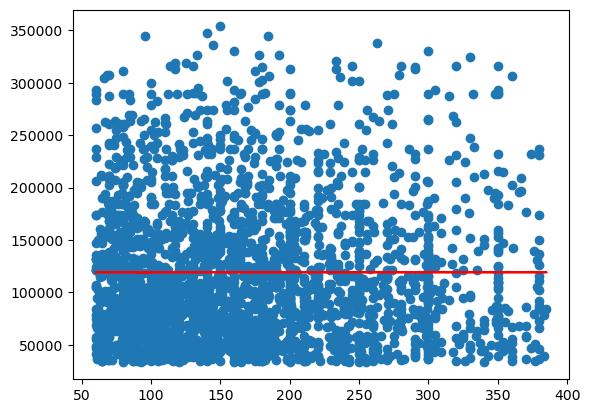

In [72]:
plt.plot(X_train['area_m2'], baseline, color = 'red', label = 'baseline')
plt.scatter(X_train['area_m2'], y_train);

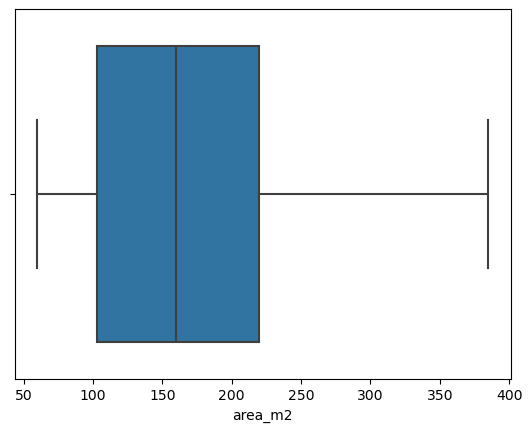

In [73]:
sns.boxplot(x = df['area_m2']);

In [74]:
y_mean = y_train.mean()
print("mean apt price is: ", y_mean)

mean apt price is:  119266.74818022328
